<a href="https://colab.research.google.com/github/v1git12/Capstone-Project2-NYC-taxi-trip-time-prediction/blob/main/Team_Colab_NYC_taxi_trip_time_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **NYC taxi trip time prediction**




##### **Project Type**    - Regression supervised
##### **Contribution** - Team
##### **Team Member 1 -** Vinayak Vijay Marathe
##### **Team Member 2 -** Riya Patel
##### **Team Member 3 -** Muskan Kasere

# **Project Summary -**

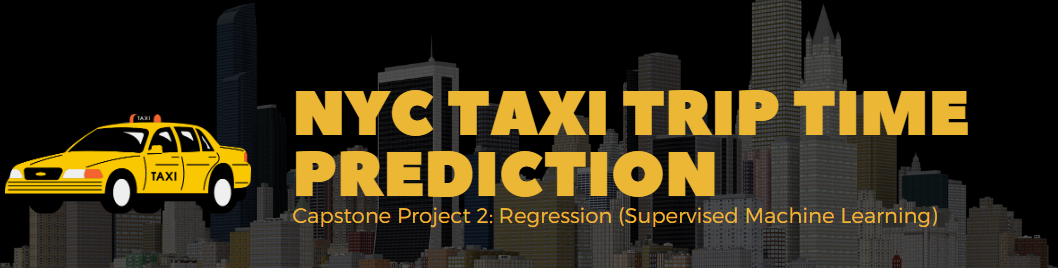

The NYC taxi trip time prediction project involves building a machine learning model to predict the time it takes for a taxi to travel from one location to another in New York City. The model takes into account various factors such as traffic conditions, weather, time of day, and origin-destination pairs to make its predictions.

To build the model, a large dataset of historical taxi trip records is used to train the model. This dataset includes information such as pickup and drop-off locations, time of day, and trip duration. Various machine learning algorithms, such as regression and decision trees, can be applied to the data to build a predictive model.

Once the model is trained, it can be used to predict the trip time for new, unseen taxi trips in NYC. This information can be useful for taxi drivers and passengers, as well as for transportation planning and optimization.

The results of the project can also be used to understand the factors that influence taxi trip times in NYC, such as traffic patterns, weather conditions, and time of day. This information can be used to make improvements to the city's transportation infrastructure and to develop more efficient transportation systems.

# **GitHub Link -**


1.   Vinayak Marathe: https://github.com/v1git12
2.   Riya Patel: https://github.com/riyapatelrp
3.   Muskan Kasere: https://github.com/MuskanKasere




# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

The problem statement for the NYC taxi trip time prediction project is to accurately predict the time it takes for a taxi to travel from one location to another in New York City. The objective is to develop a machine learning model that takes into account various factors such as  time of day, and origin-destination pairs to make its predictions.

The challenge lies in capturing the complex relationships between the various factors that influence taxi trip times and accurately predicting the trip duration for any given trip. 

The solution to this problem will have practical applications for taxi drivers and passengers, as well as for transportation planning and optimization. Accurate taxi trip time predictions can help drivers plan their routes more effectively and reduce the time and cost of travel for passengers. It can also be used to improve the city's transportation infrastructure and to develop more efficient transportation systems.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries

# Visualizations libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster


import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

You can access the data from [here](https://drive.google.com/drive/folders/1ijU7G6GoVeKveT8D7mp_4q-nOeB9C0GB)

In [3]:
# Load Dataset
#df = pd.read_csv('/content/drive/MyDrive/Capstone Project 2/NYC Taxi Data.csv')
#df = pd.read_csv('/content/drive/MyDrive/Almabetter/Projects/Capstone Projects/Data/NYC Taxi Data.csv')
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 2/NYC Taxi Data.csv')


### Dataset First View

In [4]:
# Dataset First Look
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(1458644, 11)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

The given dataset has no missing or null values
we considered as a clean dataset

### What did you know about your dataset?

In our dataset of NYC taxi trip time prediction, there are **1458644 rows** and **11 columns** with **zero null values** and **zero duplicate value**

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description 

|Fields     |Description   |
|-----------|--------------|
|**id**| A unique identifier for each trip|
|**vendor_id**|A code indicating the provider associated with the trip rec|
|**pickup datetime**|date and time when the meter was engaged|
|**dropoff datetime**|date and time when the meter was disengaged|
|**passenger_count**|the number of passengers in the vehicle (driver entered value)|
|**pickup latitude**|the latitude where the meter was engaged|
|**dropoff longitude**|the longitude where the meter was disengaged|
|**dropoff latitude**|the latitude where the meter was disengaged|
|**store and fwd flag**|This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server: Y - store and forward, N - not a store and forward trip|
|**trip duration**|duration of the trip in seconds|

**Continous numerical:** id, pickuplongitude, pickuplatitude, dropofflongitude, dropofflatitude, trip_duration

**Discrete numerical:** vendorid, passenger_count, pickup_datetime_hour, dropoff_datetime_hour

**Datetime:** pickupdatetime, dropoffdatetime

**Nominal categorical:** store_and_fwd_flag, pickup_datetime_day, pickup_datetime_month, dropoff_datetime_day, dropoff_datetime_month

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
# Here we convert the dataype from object to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])


# Map 'Y' to 1 and 'N' to 0
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  int64         
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(4), object(1)
memory usage: 122.4+ MB


In [13]:
#Calculate and assign new columns to the dataframe such as weekday,
#month and pickup_hour which will help us to gain more insights from the data.
df['weekday'] = df.pickup_datetime.dt.day_name
df['month'] = df.pickup_datetime.dt.month
df['weekday_num'] = df.pickup_datetime.dt.weekday
df['pickup_hour'] = df.pickup_datetime.dt.hour

In [14]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,<bound method PandasDelegate._add_delegate_acc...,3,0,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,<bound method PandasDelegate._add_delegate_acc...,6,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,<bound method PandasDelegate._add_delegate_acc...,1,1,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,<bound method PandasDelegate._add_delegate_acc...,4,2,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,<bound method PandasDelegate._add_delegate_acc...,3,5,13


In [15]:
df['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [16]:
df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [17]:
df['store_and_fwd_flag'].value_counts()

0    1450599
1       8045
Name: store_and_fwd_flag, dtype: int64

In [18]:
df.trip_duration.value_counts()

368      1624
408      1584
348      1582
367      1581
358      1577
         ... 
7378        1
83250       1
6615        1
34014       1
6124        1
Name: trip_duration, Length: 7417, dtype: int64

In [19]:
#Top 10 Longest trip
top10longest = df.sort_values(by=['trip_duration'],ascending=False)[:10]
top10longest


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,0,3526282,<bound method PandasDelegate._add_delegate_acc...,2,5,22
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,0,2227612,<bound method PandasDelegate._add_delegate_acc...,1,1,6
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,0,2049578,<bound method PandasDelegate._add_delegate_acc...,2,5,22
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,0,1939736,<bound method PandasDelegate._add_delegate_acc...,1,1,0
1234291,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,0,86392,<bound method PandasDelegate._add_delegate_acc...,2,0,23
295382,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,0,86391,<bound method PandasDelegate._add_delegate_acc...,5,1,13
73816,id0953667,2,2016-05-06 00:00:10,2016-05-07 00:00:00,1,-73.996010,40.753220,-73.979027,40.740601,0,86390,<bound method PandasDelegate._add_delegate_acc...,5,4,0
59891,id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.992279,40.749729,-73.962524,40.800770,0,86387,<bound method PandasDelegate._add_delegate_acc...,6,3,16
1360439,id1358458,2,2016-06-23 16:01:45,2016-06-24 16:01:30,1,-73.782089,40.644806,-73.985016,40.666828,0,86385,<bound method PandasDelegate._add_delegate_acc...,6,3,16
753765,id2589925,2,2016-05-17 22:22:56,2016-05-18 22:22:35,4,-74.006111,40.734680,-73.958809,40.815449,0,86379,<bound method PandasDelegate._add_delegate_acc...,5,1,22


In [20]:
#Top 10 shortest trip
top10shortest = df.sort_values(by=['trip_duration'])[:10]
top10shortest


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour
207497,id1520236,1,2016-05-17 09:03:38,2016-05-17 09:03:39,1,-73.819893,40.740822,-73.819885,40.740822,0,1,<bound method PandasDelegate._add_delegate_acc...,5,1,9
1382872,id0839864,1,2016-02-06 13:40:27,2016-02-06 13:40:28,1,-73.987991,40.724083,-73.987991,40.724079,0,1,<bound method PandasDelegate._add_delegate_acc...,2,5,13
1360664,id0480433,1,2016-01-14 12:33:28,2016-01-14 12:33:29,1,-73.991486,40.741940,-73.991478,40.741955,0,1,<bound method PandasDelegate._add_delegate_acc...,1,3,12
346102,id2375785,1,2016-01-15 23:57:18,2016-01-15 23:57:19,1,-73.985825,40.755760,-73.985901,40.755829,0,1,<bound method PandasDelegate._add_delegate_acc...,1,4,23
1034341,id0218424,1,2016-01-17 13:50:16,2016-01-17 13:50:17,1,-73.953728,40.670036,-73.953346,40.670021,0,1,<bound method PandasDelegate._add_delegate_acc...,1,6,13
1439166,id2943073,2,2016-01-03 16:55:44,2016-01-03 16:55:45,1,-73.975677,40.785488,-73.976372,40.785831,0,1,<bound method PandasDelegate._add_delegate_acc...,1,6,16
35196,id2536510,1,2016-04-17 11:44:49,2016-04-17 11:44:50,1,-73.940384,40.786423,-73.940300,40.786373,0,1,<bound method PandasDelegate._add_delegate_acc...,4,6,11
918415,id0900936,2,2016-02-24 22:14:20,2016-02-24 22:14:21,1,-74.004005,40.745125,-74.003998,40.745144,0,1,<bound method PandasDelegate._add_delegate_acc...,2,2,22
767271,id0229521,1,2016-06-25 23:45:12,2016-06-25 23:45:13,1,-73.982925,40.738781,-73.982925,40.738781,0,1,<bound method PandasDelegate._add_delegate_acc...,6,5,23
810851,id1250016,1,2016-03-03 17:02:47,2016-03-03 17:02:48,1,-73.946075,40.705254,-73.946075,40.705254,0,1,<bound method PandasDelegate._add_delegate_acc...,3,3,17


In [21]:
# trip duration less than 60 
st = df[df['trip_duration']<=60]
st

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour
72,id1510700,2,2016-02-20 21:58:13,2016-02-20 21:59:10,1,-73.958397,40.772629,-73.955132,40.774242,0,57,<bound method PandasDelegate._add_delegate_acc...,2,5,21
323,id2954399,1,2016-06-27 11:22:37,2016-06-27 11:23:17,1,-74.001030,40.756653,-74.000999,40.756626,0,40,<bound method PandasDelegate._add_delegate_acc...,6,0,11
842,id3263580,2,2016-05-21 12:46:46,2016-05-21 12:46:49,2,-73.782372,40.648766,-73.782372,40.648746,0,3,<bound method PandasDelegate._add_delegate_acc...,5,5,12
853,id2730154,2,2016-03-29 22:39:46,2016-03-29 22:40:44,5,-73.982201,40.731812,-73.979950,40.734814,0,58,<bound method PandasDelegate._add_delegate_acc...,3,1,22
1107,id0729156,2,2016-06-23 13:36:48,2016-06-23 13:36:50,3,-73.827660,40.716175,-73.822113,40.711452,0,2,<bound method PandasDelegate._add_delegate_acc...,6,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458044,id3200588,2,2016-03-12 01:35:35,2016-03-12 01:35:42,1,-74.007378,40.739441,-74.007378,40.739449,0,7,<bound method PandasDelegate._add_delegate_acc...,3,5,1
1458085,id1326136,2,2016-05-21 12:07:11,2016-05-21 12:07:28,1,-73.978935,40.762463,-73.977654,40.762012,0,17,<bound method PandasDelegate._add_delegate_acc...,5,5,12
1458140,id0175875,1,2016-03-22 06:18:10,2016-03-22 06:18:47,1,-73.991325,40.744934,-73.989388,40.748024,0,37,<bound method PandasDelegate._add_delegate_acc...,3,1,6
1458544,id3958653,1,2016-06-16 15:10:11,2016-06-16 15:10:49,1,-73.956459,40.767231,-73.956589,40.767269,0,38,<bound method PandasDelegate._add_delegate_acc...,6,3,15


In [22]:
import math

def distance(lat1, lon1, lat2, lon2):
    R = 6371 # Radius of the earth in km A globally-average value is usually considered to be 6,371 kilometres 
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = R * c
    return round(distance,2)
   


In [23]:
df['trip_distance'] = df.apply(lambda row: distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

In [24]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,trip_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,<bound method PandasDelegate._add_delegate_acc...,3,0,17,1.50
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,<bound method PandasDelegate._add_delegate_acc...,6,6,0,1.81
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,<bound method PandasDelegate._add_delegate_acc...,1,1,11,6.39
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,<bound method PandasDelegate._add_delegate_acc...,4,2,19,1.49
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,<bound method PandasDelegate._add_delegate_acc...,3,5,13,1.19


In [25]:
df['trip_distance'].value_counts()

0.00     7935
1.20     5255
1.18     5254
1.13     5239
1.05     5205
         ... 
32.28       1
34.44       1
33.84       1
32.97       1
64.04       1
Name: trip_distance, Length: 3357, dtype: int64

In [26]:
df.sort_values(by=['trip_distance'])

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,trip_distance
316901,id0265109,1,2016-01-10 05:25:51,2016-01-10 05:36:31,1,-73.954666,40.821003,-73.954666,40.821003,0,640,<bound method PandasDelegate._add_delegate_acc...,1,6,5,0.00
588520,id2470748,2,2016-03-17 03:00:37,2016-03-17 03:05:31,1,-73.968880,40.639091,-73.968887,40.639111,0,294,<bound method PandasDelegate._add_delegate_acc...,3,3,3,0.00
1098309,id3274648,2,2016-03-13 21:10:14,2016-03-13 21:13:39,1,-73.949097,40.807796,-73.949097,40.807796,0,205,<bound method PandasDelegate._add_delegate_acc...,3,6,21,0.00
149513,id0476136,2,2016-01-09 01:21:31,2016-01-09 01:34:19,1,-73.957344,40.801682,-73.957344,40.801682,0,768,<bound method PandasDelegate._add_delegate_acc...,1,5,1,0.00
604739,id1588869,1,2016-03-02 17:28:53,2016-03-02 17:29:35,1,-73.975487,40.760429,-73.975502,40.760437,0,42,<bound method PandasDelegate._add_delegate_acc...,3,2,17,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923793,id1001696,1,2016-02-24 21:02:32,2016-02-24 21:25:57,1,-73.972366,40.758633,-79.553535,43.674000,0,1405,<bound method PandasDelegate._add_delegate_acc...,2,2,21,562.24
1100676,id2644780,1,2016-05-03 16:24:07,2016-05-03 17:18:34,2,-73.991325,40.750023,-79.518616,43.921028,0,3267,<bound method PandasDelegate._add_delegate_acc...,5,1,16,574.88
910072,id1146400,1,2016-02-15 18:57:32,2016-02-15 19:02:35,2,-73.989914,40.756634,-70.346077,36.398121,0,303,<bound method PandasDelegate._add_delegate_acc...,2,0,18,578.84
974378,id1510552,2,2016-01-06 20:40:52,2016-01-06 20:51:03,5,-71.799896,35.081532,-79.352837,40.436329,0,611,<bound method PandasDelegate._add_delegate_acc...,1,2,20,891.21


In [27]:
df.sort_values(by=['trip_distance'],ascending=False)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,trip_distance
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,0,792,<bound method PandasDelegate._add_delegate_acc...,5,5,18,1240.91
974378,id1510552,2,2016-01-06 20:40:52,2016-01-06 20:51:03,5,-71.799896,35.081532,-79.352837,40.436329,0,611,<bound method PandasDelegate._add_delegate_acc...,1,2,20,891.21
910072,id1146400,1,2016-02-15 18:57:32,2016-02-15 19:02:35,2,-73.989914,40.756634,-70.346077,36.398121,0,303,<bound method PandasDelegate._add_delegate_acc...,2,0,18,578.84
1100676,id2644780,1,2016-05-03 16:24:07,2016-05-03 17:18:34,2,-73.991325,40.750023,-79.518616,43.921028,0,3267,<bound method PandasDelegate._add_delegate_acc...,5,1,16,574.88
923793,id1001696,1,2016-02-24 21:02:32,2016-02-24 21:25:57,1,-73.972366,40.758633,-79.553535,43.674000,0,1405,<bound method PandasDelegate._add_delegate_acc...,2,2,21,562.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254915,id2676927,1,2016-04-30 06:19:04,2016-04-30 06:19:49,1,-74.181648,40.687740,-74.181641,40.687748,0,45,<bound method PandasDelegate._add_delegate_acc...,4,5,6,0.00
994614,id2239323,2,2016-03-06 12:39:59,2016-03-06 12:40:11,1,-73.781853,40.644360,-73.781853,40.644341,0,12,<bound method PandasDelegate._add_delegate_acc...,3,6,12,0.00
1452268,id1426679,1,2016-02-12 11:32:00,2016-02-12 11:35:53,1,-73.945404,40.751530,-73.945404,40.751526,0,233,<bound method PandasDelegate._add_delegate_acc...,2,4,11,0.00
1259949,id0093263,2,2016-02-19 04:17:52,2016-02-19 04:18:00,1,-73.871010,40.774181,-73.871017,40.774189,0,8,<bound method PandasDelegate._add_delegate_acc...,2,4,4,0.00


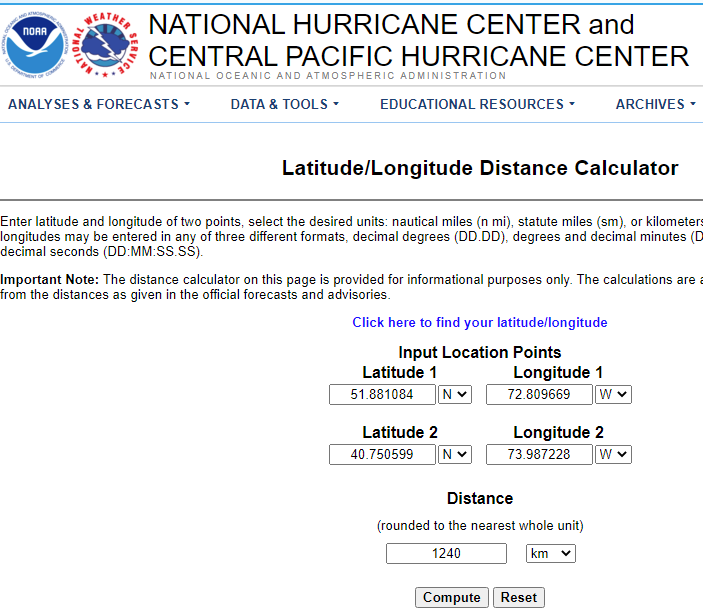

In [28]:
# trip where distance covered is 0.00 km
twzk = df.loc[df['trip_distance'] == 0.00]
twzk

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,trip_distance
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,0,227,<bound method PandasDelegate._add_delegate_acc...,2,0,18,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,0,1109,<bound method PandasDelegate._add_delegate_acc...,5,1,18,0.0
323,id2954399,1,2016-06-27 11:22:37,2016-06-27 11:23:17,1,-74.001030,40.756653,-74.000999,40.756626,0,40,<bound method PandasDelegate._add_delegate_acc...,6,0,11,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,0,947,<bound method PandasDelegate._add_delegate_acc...,5,0,23,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,0,580,<bound method PandasDelegate._add_delegate_acc...,1,0,19,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457121,id2651184,1,2016-04-03 07:24:06,2016-04-03 07:24:13,1,-73.913620,40.765675,-73.913620,40.765667,0,7,<bound method PandasDelegate._add_delegate_acc...,4,6,7,0.0
1457136,id1907784,1,2016-03-25 20:06:52,2016-03-25 20:09:48,1,-73.966705,40.769783,-73.966705,40.769783,0,176,<bound method PandasDelegate._add_delegate_acc...,3,4,20,0.0
1457462,id1813892,1,2016-01-19 18:09:44,2016-01-19 18:10:09,3,-73.951660,40.809105,-73.951668,40.809101,0,25,<bound method PandasDelegate._add_delegate_acc...,1,1,18,0.0
1457746,id1044471,2,2016-01-29 21:58:11,2016-01-29 21:58:23,1,-73.975708,40.733089,-73.975685,40.733101,0,12,<bound method PandasDelegate._add_delegate_acc...,1,4,21,0.0


In [29]:
betweenzero1 = df.loc[(df['trip_distance'] > 0) & (df['trip_distance'] <=1)]
betweenzero1

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,trip_distance
13,id0799785,2,2016-06-01 20:58:29,2016-06-01 21:02:49,1,-73.956306,40.767941,-73.966110,40.763000,0,260,<bound method PandasDelegate._add_delegate_acc...,6,2,20,0.99
15,id3319787,1,2016-05-16 15:29:02,2016-05-16 15:32:33,1,-73.955513,40.768593,-73.948761,40.771545,0,211,<bound method PandasDelegate._add_delegate_acc...,5,0,15,0.66
37,id2403238,1,2016-06-23 23:00:09,2016-06-23 23:04:46,1,-73.988068,40.728081,-73.980751,40.721470,0,277,<bound method PandasDelegate._add_delegate_acc...,6,3,23,0.96
68,id1680350,1,2016-03-18 20:56:16,2016-03-18 20:59:51,1,-74.002983,40.723312,-74.001556,40.728825,0,215,<bound method PandasDelegate._add_delegate_acc...,3,4,20,0.62
72,id1510700,2,2016-02-20 21:58:13,2016-02-20 21:59:10,1,-73.958397,40.772629,-73.955132,40.774242,0,57,<bound method PandasDelegate._add_delegate_acc...,2,5,21,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458617,id0820021,2,2016-04-15 08:31:20,2016-04-15 08:34:48,1,-73.975433,40.752411,-73.973122,40.746780,0,208,<bound method PandasDelegate._add_delegate_acc...,4,4,8,0.66
1458622,id0125435,2,2016-02-19 18:26:52,2016-02-19 18:36:04,1,-74.008408,40.721142,-74.000557,40.723911,0,552,<bound method PandasDelegate._add_delegate_acc...,2,4,18,0.73
1458624,id3482902,1,2016-03-01 07:21:04,2016-03-01 07:23:36,1,-73.974693,40.756088,-73.969971,40.762115,0,152,<bound method PandasDelegate._add_delegate_acc...,3,1,7,0.78
1458635,id3027038,2,2016-05-19 14:46:55,2016-05-19 14:50:52,1,-73.985390,40.763020,-73.989708,40.767502,0,237,<bound method PandasDelegate._add_delegate_acc...,5,3,14,0.62


In [30]:
between1_2 = df.loc[(df['trip_distance'] > 1) & (df['trip_distance'] <=2)]
between1_2

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,trip_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,<bound method PandasDelegate._add_delegate_acc...,3,0,17,1.50
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,<bound method PandasDelegate._add_delegate_acc...,6,6,0,1.81
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,<bound method PandasDelegate._add_delegate_acc...,4,2,19,1.49
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,<bound method PandasDelegate._add_delegate_acc...,3,5,13,1.19
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,0,443,<bound method PandasDelegate._add_delegate_acc...,1,5,22,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458630,id0287353,2,2016-06-25 03:44:32,2016-06-25 03:53:41,5,-73.991508,40.727135,-73.988136,40.740932,0,549,<bound method PandasDelegate._add_delegate_acc...,6,5,3,1.56
1458631,id1724231,1,2016-05-14 23:18:23,2016-05-14 23:24:05,3,-73.958946,40.763725,-73.953156,40.780003,0,342,<bound method PandasDelegate._add_delegate_acc...,5,5,23,1.87
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,<bound method PandasDelegate._add_delegate_acc...,4,4,13,1.23
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,<bound method PandasDelegate._add_delegate_acc...,1,1,15,1.09


In [31]:
between2_5 = df.loc[(df['trip_distance'] > 2) & (df['trip_distance'] <=5)]
between2_5

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,trip_distance
10,id1436371,2,2016-05-10 22:08:41,2016-05-10 22:29:55,1,-73.982651,40.763840,-74.002228,40.732990,0,1274,<bound method PandasDelegate._add_delegate_acc...,5,1,22,3.81
11,id1299289,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4,-73.991531,40.749439,-73.956543,40.770630,0,1128,<bound method PandasDelegate._add_delegate_acc...,5,6,11,3.77
16,id3379579,2,2016-04-11 17:29:50,2016-04-11 18:08:26,1,-73.991165,40.755562,-73.999290,40.725353,0,2316,<bound method PandasDelegate._add_delegate_acc...,4,0,17,3.43
17,id1154431,1,2016-04-14 08:48:26,2016-04-14 09:00:37,1,-73.994255,40.745804,-73.999657,40.723343,0,731,<bound method PandasDelegate._add_delegate_acc...,4,3,8,2.54
18,id3552682,1,2016-06-27 09:55:13,2016-06-27 10:17:10,1,-74.003983,40.713013,-73.979195,40.749924,0,1317,<bound method PandasDelegate._add_delegate_acc...,6,0,9,4.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458629,id3109086,2,2016-06-24 10:33:51,2016-06-24 10:43:52,1,-73.959618,40.808941,-73.947922,40.830189,0,601,<bound method PandasDelegate._add_delegate_acc...,6,4,10,2.56
1458632,id0469946,2,2016-03-06 11:04:48,2016-03-06 11:17:45,2,-74.015572,40.710892,-73.996620,40.743633,0,777,<bound method PandasDelegate._add_delegate_acc...,3,6,11,3.98
1458633,id2432342,1,2016-03-17 19:10:16,2016-03-17 19:26:35,3,-73.979652,40.735279,-73.995522,40.759754,0,979,<bound method PandasDelegate._add_delegate_acc...,3,3,19,3.03
1458637,id1920898,1,2016-04-17 18:48:16,2016-04-17 19:00:56,1,-73.975357,40.751705,-73.949478,40.776764,0,760,<bound method PandasDelegate._add_delegate_acc...,4,6,18,3.54


In [32]:
grt_5 = df.loc[df['trip_distance'] > 5]
grt_5

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,trip_distance
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,<bound method PandasDelegate._add_delegate_acc...,1,1,11,6.39
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,0,1551,<bound method PandasDelegate._add_delegate_acc...,5,5,7,5.71
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,0,1225,<bound method PandasDelegate._add_delegate_acc...,3,3,21,5.12
14,id2900608,2,2016-05-27 00:43:36,2016-05-27 01:07:10,1,-73.992195,40.727226,-73.974655,40.783070,0,1414,<bound method PandasDelegate._add_delegate_acc...,5,4,0,6.38
24,id3321406,2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.788750,40.641472,0,2485,<bound method PandasDelegate._add_delegate_acc...,6,4,8,20.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458600,id0995846,2,2016-05-09 17:26:56,2016-05-09 18:30:37,2,-73.789543,40.647099,-73.960320,40.798180,0,3821,<bound method PandasDelegate._add_delegate_acc...,5,0,17,22.12
1458606,id0652425,2,2016-04-13 16:06:12,2016-04-13 16:38:24,1,-73.994080,40.751179,-74.017143,40.705460,0,1932,<bound method PandasDelegate._add_delegate_acc...,4,2,16,5.44
1458634,id3445276,1,2016-04-03 13:51:25,2016-04-03 14:07:37,2,-73.989075,40.730465,-73.963882,40.773739,0,972,<bound method PandasDelegate._add_delegate_acc...,4,6,13,5.26
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,<bound method PandasDelegate._add_delegate_acc...,1,6,7,6.05


In [33]:
def speed(dis, time):
  s = dis / time
  sph = s*3600
  return sph



In [34]:
df['average_speed in kmph'] = df.apply(lambda row: speed(row['trip_distance'], row['trip_duration']), axis=1)

In [35]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,trip_distance,average_speed in kmph
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,<bound method PandasDelegate._add_delegate_acc...,3,0,17,1.50,11.868132
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,<bound method PandasDelegate._add_delegate_acc...,6,6,0,1.81,9.828054
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,<bound method PandasDelegate._add_delegate_acc...,1,1,11,6.39,10.830508
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,<bound method PandasDelegate._add_delegate_acc...,4,2,19,1.49,12.503497
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,<bound method PandasDelegate._add_delegate_acc...,3,5,13,1.19,9.848276


In [36]:
df.sort_values(by=['average_speed in kmph'],ascending=False)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,trip_distance,average_speed in kmph
1176337,id3619353,2,2016-02-13 20:28:30,2016-02-13 20:28:37,1,-73.936974,40.764610,-73.789848,40.646858,0,7,<bound method PandasDelegate._add_delegate_acc...,2,5,20,18.03,9272.571429
910072,id1146400,1,2016-02-15 18:57:32,2016-02-15 19:02:35,2,-73.989914,40.756634,-70.346077,36.398121,0,303,<bound method PandasDelegate._add_delegate_acc...,2,0,18,578.84,6877.306931
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,0,792,<bound method PandasDelegate._add_delegate_acc...,5,5,18,1240.91,5640.500000
974378,id1510552,2,2016-01-06 20:40:52,2016-01-06 20:51:03,5,-71.799896,35.081532,-79.352837,40.436329,0,611,<bound method PandasDelegate._add_delegate_acc...,1,2,20,891.21,5250.991817
377068,id0116374,1,2016-04-02 20:33:19,2016-04-02 20:38:01,1,-74.007095,40.717113,-76.963242,38.946033,0,282,<bound method PandasDelegate._add_delegate_acc...,4,5,20,320.13,4086.765957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603787,id2346300,2,2016-05-24 18:13:09,2016-05-24 19:09:44,2,-73.951721,40.823250,-73.951721,40.823250,0,3395,<bound method PandasDelegate._add_delegate_acc...,5,1,18,0.00,0.000000
926255,id3355133,2,2016-03-27 21:04:42,2016-03-27 21:17:20,5,-73.912666,40.769310,-73.912666,40.769310,0,758,<bound method PandasDelegate._add_delegate_acc...,3,6,21,0.00,0.000000
756753,id0565721,1,2016-03-03 15:45:59,2016-03-03 15:46:04,1,-73.875732,40.773602,-73.875732,40.773602,0,5,<bound method PandasDelegate._add_delegate_acc...,3,3,15,0.00,0.000000
603783,id2759551,2,2016-01-22 08:54:43,2016-01-22 09:13:57,1,-73.964493,40.666237,-73.964493,40.666237,0,1154,<bound method PandasDelegate._add_delegate_acc...,1,4,8,0.00,0.000000


In [37]:
avgmaxspeed = df.loc[df['average_speed in kmph'] <= 80]
avgmaxspeed.sort_values(by=['average_speed in kmph'],ascending=False)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,trip_distance,average_speed in kmph
1006982,id0855175,2,2016-04-10 16:48:24,2016-04-10 16:48:33,5,-73.980713,40.753658,-73.981819,40.752071,0,9,<bound method PandasDelegate._add_delegate_acc...,4,6,16,0.20,80.000000
34055,id3294700,2,2016-03-22 07:19:38,2016-03-22 07:20:47,1,-73.826897,40.717232,-73.838722,40.727699,0,69,<bound method PandasDelegate._add_delegate_acc...,3,1,7,1.53,79.826087
1015059,id3373706,2,2016-06-18 05:18:42,2016-06-18 05:18:56,1,-73.786636,40.644501,-73.783020,40.643951,0,14,<bound method PandasDelegate._add_delegate_acc...,6,5,5,0.31,79.714286
552151,id1761199,1,2016-01-26 21:36:57,2016-01-26 21:51:56,4,-74.141441,40.676033,-73.954613,40.783836,0,899,<bound method PandasDelegate._add_delegate_acc...,1,1,21,19.79,79.248053
142468,id2207300,2,2016-03-12 18:34:55,2016-03-12 18:35:10,1,-73.984489,40.755009,-73.981461,40.753181,0,15,<bound method PandasDelegate._add_delegate_acc...,3,5,18,0.33,79.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150692,id3722655,2,2016-05-10 06:37:48,2016-05-10 06:37:56,1,-73.788597,40.647282,-73.788597,40.647282,0,8,<bound method PandasDelegate._add_delegate_acc...,5,1,6,0.00,0.000000
898697,id0532172,2,2016-02-29 15:29:29,2016-02-29 15:55:59,1,-74.021683,40.875751,-74.021683,40.875751,0,1590,<bound method PandasDelegate._add_delegate_acc...,2,0,15,0.00,0.000000
1005716,id3113644,1,2016-03-09 22:33:16,2016-03-09 22:33:37,2,-73.932854,40.672443,-73.932854,40.672443,0,21,<bound method PandasDelegate._add_delegate_acc...,3,2,22,0.00,0.000000
1150710,id2395053,2,2016-06-08 11:58:59,2016-06-08 12:06:47,1,-73.994431,40.761909,-73.994431,40.761909,0,468,<bound method PandasDelegate._add_delegate_acc...,6,2,11,0.00,0.000000


In [38]:
out =df.loc[df['average_speed in kmph'] > 80]
out.sort_values(by=['average_speed in kmph'],ascending=False)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,trip_distance,average_speed in kmph
1176337,id3619353,2,2016-02-13 20:28:30,2016-02-13 20:28:37,1,-73.936974,40.764610,-73.789848,40.646858,0,7,<bound method PandasDelegate._add_delegate_acc...,2,5,20,18.03,9272.571429
910072,id1146400,1,2016-02-15 18:57:32,2016-02-15 19:02:35,2,-73.989914,40.756634,-70.346077,36.398121,0,303,<bound method PandasDelegate._add_delegate_acc...,2,0,18,578.84,6877.306931
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,0,792,<bound method PandasDelegate._add_delegate_acc...,5,5,18,1240.91,5640.500000
974378,id1510552,2,2016-01-06 20:40:52,2016-01-06 20:51:03,5,-71.799896,35.081532,-79.352837,40.436329,0,611,<bound method PandasDelegate._add_delegate_acc...,1,2,20,891.21,5250.991817
377068,id0116374,1,2016-04-02 20:33:19,2016-04-02 20:38:01,1,-74.007095,40.717113,-76.963242,38.946033,0,282,<bound method PandasDelegate._add_delegate_acc...,4,5,20,320.13,4086.765957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935109,id0807881,2,2016-02-03 01:23:28,2016-02-03 01:23:56,2,-73.956871,40.766541,-73.953270,40.771549,0,28,<bound method PandasDelegate._add_delegate_acc...,2,2,1,0.63,81.000000
1407464,id1710541,1,2016-05-02 02:30:45,2016-05-02 02:30:49,1,-74.038475,40.635353,-74.038902,40.634563,0,4,<bound method PandasDelegate._add_delegate_acc...,5,0,2,0.09,81.000000
9561,id3876330,2,2016-03-08 23:42:30,2016-03-08 23:42:34,2,-73.789108,40.641392,-73.788429,40.642010,0,4,<bound method PandasDelegate._add_delegate_acc...,3,1,23,0.09,81.000000
623844,id3374995,2,2016-03-30 23:08:33,2016-03-30 23:24:02,1,-74.030617,40.604820,-74.134155,40.775433,0,929,<bound method PandasDelegate._add_delegate_acc...,3,2,23,20.88,80.912809


In [39]:

# Create a new column 'Day of Week'
df['Day of Week(P)'] = df['pickup_datetime'].apply(lambda x: "Weekday" if x.weekday() < 5 else "Weekend")
df['Day of Week(D)'] = df['dropoff_datetime'].apply(lambda x: "Weekday" if x.weekday() < 5 else "Weekend")




In [40]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,trip_distance,average_speed in kmph,Day of Week(P),Day of Week(D)
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,<bound method PandasDelegate._add_delegate_acc...,4,4,13,1.23,5.691517,Weekday,Weekday
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,<bound method PandasDelegate._add_delegate_acc...,1,6,7,6.05,33.251908,Weekend,Weekend
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,<bound method PandasDelegate._add_delegate_acc...,4,4,6,7.82,36.848168,Weekday,Weekday
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,<bound method PandasDelegate._add_delegate_acc...,1,1,15,1.09,10.520107,Weekday,Weekday
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,0,198,<bound method PandasDelegate._add_delegate_acc...,4,1,14,1.13,20.545455,Weekday,Weekday


In [41]:
df['Day of Week(D)'].value_counts()

Weekday    1040518
Weekend     418126
Name: Day of Week(D), dtype: int64

In [42]:
df['Day of Week(P)'].value_counts()

Weekday    1042410
Weekend     416234
Name: Day of Week(P), dtype: int64

In [43]:
((1042410-1040518)/1042410)*100

0.18150247983039303

In [44]:
((418126-416234)/418126)*100

0.45249518087849117

In [45]:
# Peak hours for pickups
def get_trips(a,b):
  A = (df['pickup_datetime'].dt.hour >= a) & (df['pickup_datetime'].dt.hour < b)
  peak_A = df[A]
  row_count = peak_A.shape[0]
  print(f'Number of trips between {a} and {b} is :{row_count}')

In [46]:
atime=list(np.arange(25))
btime=list(np.arange(1,25))
for a,b in zip(atime,btime):
  d = get_trips(a,b)

Number of trips between 0 and 1 is :53248
Number of trips between 1 and 2 is :38571
Number of trips between 2 and 3 is :27972
Number of trips between 3 and 4 is :20895
Number of trips between 4 and 5 is :15792
Number of trips between 5 and 6 is :15002
Number of trips between 6 and 7 is :33248
Number of trips between 7 and 8 is :55600
Number of trips between 8 and 9 is :67053
Number of trips between 9 and 10 is :67663
Number of trips between 10 and 11 is :65437
Number of trips between 11 and 12 is :68476
Number of trips between 12 and 13 is :71873
Number of trips between 13 and 14 is :71473
Number of trips between 14 and 15 is :74292
Number of trips between 15 and 16 is :71811
Number of trips between 16 and 17 is :64313
Number of trips between 17 and 18 is :76483
Number of trips between 18 and 19 is :90600
Number of trips between 19 and 20 is :90308
Number of trips between 20 and 21 is :84072
Number of trips between 21 and 22 is :84185
Number of trips between 22 and 23 is :80492
Number 

In [47]:
peakhours = (df['pickup_datetime'].dt.hour >= 18) & (df['pickup_datetime'].dt.hour < 22)
df[peakhours].shape[0]

349165

between 6 pm to 10 pm the average there are **349165** taxi's are running
Means **6 to 10 pm are PEAK HOURS**


In [48]:
off_peak_hours = (df['pickup_datetime'].dt.hour >= 2) & (df['pickup_datetime'].dt.hour < 6)
df[off_peak_hours].shape[0]

79661

between 2 am to 6 am the average there are **only 79661** taxi's are running Means **2 to 6 am are OFF-PEAK HOURS**

Now lets calculate the count of unique date in our dataset of both pickup and dropoff

In [49]:
df['pickup_datetime'].dt.date.nunique()

182

In [50]:
df['dropoff_datetime'].dt.date.nunique()

183

Here we found out our data is distributed in 182 unique pickups date and 183 unique dropoff date

In [51]:
singlePday = round((349165 / 182))
print(f'The PEAK hours is between 6 pm to 10 pm where on an average {singlePday} number of ongoing trips per day in Newyork City') 

The PEAK hours is between 6 pm to 10 pm where on an average 1918 number of ongoing trips per day in Newyork City


In [52]:
singleoPday = round((79661 / 182))
print(f'The OFF-PEAK hours is between 2 to 6 am where on an average {singleoPday} number of ongoing trips per day in Newyork City') 

The OFF-PEAK hours is between 2 to 6 am where on an average 438 number of ongoing trips per day in Newyork City


Now lets check the peak and offpeak hours during weekend and weekdays

In [53]:
dummydf = df.copy()

In [54]:
dummydf['peak_hour'] = ((dummydf['pickup_datetime'].dt.hour >= 18) & (dummydf['pickup_datetime'].dt.hour < 22))
dummydf['offpeak_hour'] = ((dummydf['pickup_datetime'].dt.hour >= 2) & (dummydf['pickup_datetime'].dt.hour < 6))

In [55]:
dummydf.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,weekday,month,weekday_num,pickup_hour,trip_distance,average_speed in kmph,Day of Week(P),Day of Week(D),peak_hour,offpeak_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,<bound method PandasDelegate._add_delegate_acc...,3,0,17,1.50,11.868132,Weekday,Weekday,False,False
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,<bound method PandasDelegate._add_delegate_acc...,6,6,0,1.81,9.828054,Weekend,Weekend,False,False
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,<bound method PandasDelegate._add_delegate_acc...,1,1,11,6.39,10.830508,Weekday,Weekday,False,False
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,<bound method PandasDelegate._add_delegate_acc...,4,2,19,1.49,12.503497,Weekday,Weekday,True,False
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,<bound method PandasDelegate._add_delegate_acc...,3,5,13,1.19,9.848276,Weekend,Weekend,False,False


In [56]:
ph_during_week = dummydf.groupby(['Day of Week(P)','peak_hour']).size()
ph_during_week

Day of Week(P)  peak_hour
Weekday         False        780836
                True         261574
Weekend         False        328643
                True          87591
dtype: int64

In [57]:
print(round((261574/182)))
print(round((87591/182)))
print(round(((1437-481)/1437)*100))

1437
481
67


During **weekdays** in peak hours there are **1437** ongoing trips available
& during **weekends** in Peak hours there are **481** ongoing trips available
* here we see during peak hours trips are **67 % less on weekends** as compare to weekdays

In [58]:
# extract the hour from the datetime column
dummydf['hour'] = dummydf['pickup_datetime'].dt.hour

# count the number of trips for each hour
hourly_counts = dummydf['hour'].value_counts()

# find the busiest hour
busiest_hour = hourly_counts.idxmax()
busiest_hour
print("The busiest hour for taxi trips is hour:", busiest_hour)
print("The number of trips in that hour is:", hourly_counts[busiest_hour])
print('Average Trip in that hour in one single day: ',hourly_counts[busiest_hour]/182 )

The busiest hour for taxi trips is hour: 18
The number of trips in that hour is: 90600
Average Trip in that hour in one single day:  497.8021978021978


In [59]:

# extract the date from the datetime column
dummydf['date'] = dummydf['pickup_datetime'].dt.date

# count the number of trips for each date
daily_counts = dummydf['date'].value_counts()

# find the busiest day
busiest_day = daily_counts.idxmax()

# print the results
print("The busiest day for taxi trips is:", busiest_day)
print("The number of trips on that day is:", daily_counts[busiest_day])


The busiest day for taxi trips is: 2016-04-09
The number of trips on that day is: 9796


In [60]:

# create a boolean mask for the specific date

mask = dummydf['pickup_datetime'].dt.date == pd.to_datetime(busiest_day).date()

# fetch the rows with the specific date using boolean indexing with loc
specific_date_data = dummydf.loc[mask]

# print the fetched dummydf
print("Data with date", busiest_day, ":\n", specific_date_data)
specific_date_data

Data with date 2016-04-09 :
                 id  vendor_id     pickup_datetime    dropoff_datetime  \
22       id2352683          1 2016-04-09 03:34:27 2016-04-09 03:41:30   
106      id3277902          1 2016-04-09 15:04:31 2016-04-09 15:11:30   
194      id2075052          1 2016-04-09 09:09:03 2016-04-09 09:20:03   
324      id3152963          1 2016-04-09 22:33:22 2016-04-09 22:41:03   
361      id1789034          1 2016-04-09 23:41:23 2016-04-09 23:51:42   
...            ...        ...                 ...                 ...   
1458086  id1306729          1 2016-04-09 17:42:16 2016-04-09 18:00:36   
1458157  id0117615          1 2016-04-09 10:19:16 2016-04-09 10:33:14   
1458536  id3423195          2 2016-04-09 04:29:43 2016-04-09 04:57:47   
1458559  id1976498          2 2016-04-09 20:35:37 2016-04-09 20:52:05   
1458598  id0018431          1 2016-04-09 00:44:34 2016-04-09 00:53:01   

         passenger_count  pickup_longitude  pickup_latitude  \
22                     1       

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,weekday_num,pickup_hour,trip_distance,average_speed in kmph,Day of Week(P),Day of Week(D),peak_hour,offpeak_hour,hour,date
22,id2352683,1,2016-04-09 03:34:27,2016-04-09 03:41:30,1,-73.995865,40.758812,-73.993324,40.740322,0,...,5,3,2.07,17.617021,Weekend,Weekend,False,True,3,2016-04-09
106,id3277902,1,2016-04-09 15:04:31,2016-04-09 15:11:30,1,-73.973167,40.755699,-73.988655,40.736996,0,...,5,15,2.46,21.136038,Weekend,Weekend,False,False,15,2016-04-09
194,id2075052,1,2016-04-09 09:09:03,2016-04-09 09:20:03,1,-73.954498,40.766808,-73.987785,40.720879,0,...,5,9,5.83,31.800000,Weekend,Weekend,False,False,9,2016-04-09
324,id3152963,1,2016-04-09 22:33:22,2016-04-09 22:41:03,2,-73.955116,40.769001,-73.971542,40.785370,0,...,5,22,2.29,17.882863,Weekend,Weekend,False,False,22,2016-04-09
361,id1789034,1,2016-04-09 23:41:23,2016-04-09 23:51:42,1,-73.982559,40.742352,-73.992500,40.725266,0,...,5,23,2.08,12.096931,Weekend,Weekend,False,False,23,2016-04-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458086,id1306729,1,2016-04-09 17:42:16,2016-04-09 18:00:36,2,-74.013969,40.712830,-73.990311,40.756554,0,...,5,17,5.25,17.181818,Weekend,Weekend,False,False,17,2016-04-09
1458157,id0117615,1,2016-04-09 10:19:16,2016-04-09 10:33:14,1,-73.988968,40.777557,-73.984047,40.761631,0,...,5,10,1.82,7.818616,Weekend,Weekend,False,False,10,2016-04-09
1458536,id3423195,2,2016-04-09 04:29:43,2016-04-09 04:57:47,2,-73.985168,40.727493,-73.907326,40.683338,0,...,5,4,8.20,17.529691,Weekend,Weekend,False,True,4,2016-04-09
1458559,id1976498,2,2016-04-09 20:35:37,2016-04-09 20:52:05,2,-73.989891,40.729790,-73.984070,40.757496,0,...,5,20,3.12,11.368421,Weekend,Weekend,True,False,20,2016-04-09


In [61]:
n = (specific_date_data['pickup_datetime'].dt.hour >= 18) & (specific_date_data['pickup_datetime'].dt.hour < 22)

# fetch the rows within the time range using boolean indexing with loc
peak_hour_on_busiestday = specific_date_data.loc[n]

# print the fetched specific_date_data
# print("specific_date_data between 6 and 7 pm", peak_hour_on_busiestday)
peak_hour_on_busiestday.shape[0]

2095

In [62]:
oph_during_week = dummydf.groupby(['Day of Week(P)','offpeak_hour']).size()
oph_during_week

Day of Week(P)  offpeak_hour
Weekday         False           1004782
                True              37628
Weekend         False            374201
                True              42033
dtype: int64

In [63]:
print(round((37628/182)))
print(round((42033/182)))
print(round(((231-207)/207)*100))

207
231
12


During **weekdays** in offpeak hours there are **207** ongoing trips available
& during **weekends** in offPeak hours there are **231** ongoing trips available
* here we see during offpeak hours trips are **12 % more on weekends** as compare to weekdays

In [64]:
df.groupby('Day of Week(P)')['trip_duration'].mean()


Day of Week(P)
Weekday    972.759085
Weekend    926.267073
Name: trip_duration, dtype: float64

In [65]:
import datetime
def sectoTime(n):
  # Convert the number of seconds to a timedelta object
  time_delta = datetime.timedelta(seconds=n)

  # Convert the timedelta object to a datetime object
  time_obj = datetime.datetime(1, 1, 1) + time_delta

  # Extract the time part from the datetime object
  time_str = time_obj.time().strftime('%H:%M:%S')

  # Print the time in the hh:mm:ss format
  print(time_str)


In [66]:
sectoTime(972.759085)
sectoTime(926.267073)


00:16:12
00:15:26


In [67]:
df.groupby('Day of Week(P)')['average_speed in kmph'].mean()

Day of Week(P)
Weekday    13.869874
Weekend    15.805989
Name: average_speed in kmph, dtype: float64

### What all manipulations have you done and insights you found?



1.   There are only 2 vendors , vendor 1 and  2, vendor 2 has **780302**
while vendor 1 has **678342** trip respectively
2.  10 unique number of passenger count. with passenger count 1 has most trips **1033540**
3.  There are 1450599 times trip data Store and forwarded and 8045 time trip data not stored and forwaded
4. we convert the dataype of pickup_datetime and dropoff datetime from object to datetime
5. Also we mapped the stored and forwarded flag from Y/N to 1/0 which is now converted into int64 i.e numeric data that we require further
6. Our dependent variable is trip duration
7. We introduce a new column say **trip distance** which will give us the distance covered during a trip
8. Longest trip distance in km is **1240.91 km**
9. **7935 trips** where distance covered by taxi is 0.00 km
10. **240459 trips** where distance covered by taxi is between zero and 1 km
11. **450488 trips** where distance covered by taxi is between 1 and 2 km
12. **497469 trips** where distance covered by taxi is between 2 and 5 km
13. **262293 trips** where distance covered by taxi is greater 5 km
14. We introduce a new column say Average speed of a journey in kmph
15. In peak hours (between 6 to 10 pm) traffic/ trips are **77.18%** more than off peak hours (between 2 am to 6 am)
16. Busiest hour in a day is between **6 to 7 pm**
17. The **PEAK hours** is between 6 pm to 10 pm where on an average **1918** number of ongoing trips per day in Newyork City
18. The **OFF-PEAK hours** is between 2 to 6 am where on an average **438** number of ongoing trips per day in Newyork City
19. during peak hours trips are **67 % less on weekends** as compare to weekdays
20. during offpeak hours trips are **12 % more on weekends** as compare to weekdays
21. Average trip duration during weekdays :**16 minutes 12 seconds**
22. Average trip duration during weekends :**15 minutes 26 seconds**
23. Average speed during weekdays :**13.87 kmph**
24. Average speed during weekends :**15.81 kmph**
25. The **busiest day** for taxi trips is: **2016-04-09** i.e **9th April 2016**
    The number of trips on that day is: **9796**
26. The number of trips on busiest day in peak_hour is **2095**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Maps

In [ ]:
# Chart - 1 visualization code
map_df =df.sample(n=25000)
map_df

In [ ]:

pickup_location = map_df[['pickup_latitude', 'pickup_longitude']]

# Calculate the mean values for latitude and longitude
mean_latitude = pickup_location['pickup_latitude'].mean()
mean_longitude = pickup_location['pickup_longitude'].mean()

# Create a map centered on the mean latitude and longitude values
m = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=11)

# Add markers for the pickup locations
for index, row in pickup_location.iterrows():
    folium.Marker(location=[row['pickup_latitude'], row['pickup_longitude']]).add_to(m)

# Show the map
m


In [ ]:
#Extracting required columns from our main dataset
# map_df = map_df[['dropoff_latitude', 'dropoff_longitude', ['dropoff_datetime'].dt.month]]
# map_df['dropoff_latitude'] = map_df['dropoff_latitude'].astype(float)
# map_df['dropoff_longitude'] = map_df['dropoff_longitude'].astype(float)
# map_df['Month'] = map_df['dropoff_month'].astype(float)

# map_df = map_df.dropna(axis=0, subset=['dropoff_latitude','dropoff_longitude', 'Month'])

In [ ]:
map_df['Month'] = (map_df['dropoff_datetime'].dt.month).astype(float)


In [ ]:
map_df['dropoff_datetime'].dt.month

In [ ]:
# dropoff_maps = folium.Map(width=800,height=400,location=[40.767937,-73.982155], zoom_start=13)
# FastMarkerCluster(data = map_df).add_to(dropoff_maps)

# # List comprehension to make out list of lists
# data = [[[row['dropoff_latitude'],row['dropoff_longitude']] 
#               for index, row in map_df[(map_df['dropoff_datetime'].dt.month) == i].iterrows()] 
#                  for i in range(0,6)]
               

# # Plot it on the map
# hm = plugins.HeatMapWithTime(data,auto_play=True,max_opacity=0.8)
# hm.add_to(dropoff_maps)

# # Display the map
# dropoff_maps

In [ ]:
pickups_map = folium.Map(width=800,height=400,location=[40.75092,-73.9734], zoom_start=5)
FastMarkerCluster(data=map_df).add_to(pickups_map)
pickups_map

In [ ]:
plt.figure(figsize=(10,6))
pickups = sns.scatterplot(df.pickup_longitude,df.pickup_latitude,hue=df.vendor_id)
plt.ioff()

In [ ]:
plt.figure(figsize=(10,6))
dropoff = sns.scatterplot(df.dropoff_longitude,df.dropoff_latitude,hue=df.vendor_id)
plt.ioff()

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.pickup_longitude,df.pickup_latitude,hue=df.passenger_count,palette='dark')
plt.ioff()

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(df.pickup_longitude,df.pickup_latitude,hue=df.store_and_fwd_flag)
plt.ioff()

In [ ]:

# Select the columns of interest
dropoff_location = map_df[['pickup_latitude', 'pickup_longitude']]

# Plot the latitude and longitude values on a scatter plot
plt.scatter(dropoff_location['pickup_latitude'], dropoff_location['pickup_longitude'])

# Add customizations to the plot
plt.title("loacation of NYC Taxi pickups")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
correlation = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(correlation, annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

there is strong correlation in pickup and dropoff location

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
sns.displot(data=map_df, x='trip_distance',kde=True)

In [ ]:
sns.displot(data=map_df, x='trip_duration', kde=True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 Box plot

In [ ]:
# Chart - 4 visualization code
sp =df['average_speed in kmph']
sp.plot(kind='box')
plt.show()

In [ ]:
sp =df['average_speed in kmph']
sp.plot(kind='box')
plt.show()

In [ ]:
df['trip_duration'].plot(kind='box')
plt.show()

In [ ]:
df['trip_distance'].plot(kind='box')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 Categorical plot

In [ ]:
# Chart - 6 visualization code
#Passenger counts in a trip of different vendors in weekdays and weekends
sns.catplot(data=df, x="Day of Week(P)", y="passenger_count", hue='vendor_id', kind="boxen")

In [ ]:
df.head()

In [ ]:
sns.catplot(data=df, x="Day of Week(P)", y="passenger_count", hue='store_and_fwd_flag', kind="boxen")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

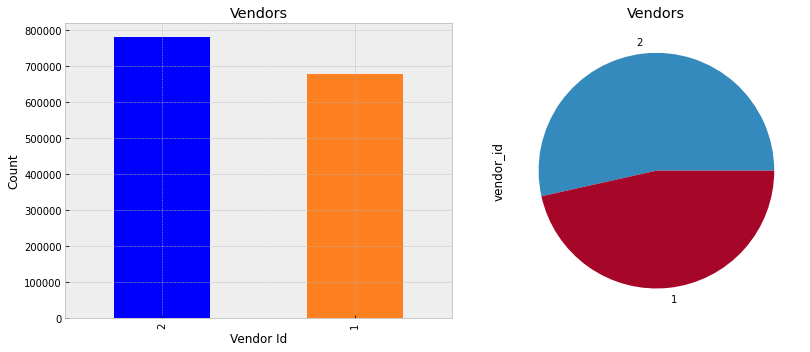

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax = df['vendor_id'].value_counts().plot(kind='bar',title="Vendors",ax=axes[0],color = ('blue',(1, 0.5, 0.13)))
df['vendor_id'].value_counts().plot(kind='pie',title="Vendors",ax=axes[1])
ax.set_ylabel("Count")
ax.set_xlabel("Vendor Id")
fig.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

*  Here we got to know that there are only 2 venders(1 and 2)
*  Both the venders share almost equal amount of trips, the difference is quite low between two venders
*  But Vendor 2 is evidently more famous among the population as per the above graphs.Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format #To suppress scientific notation.
df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

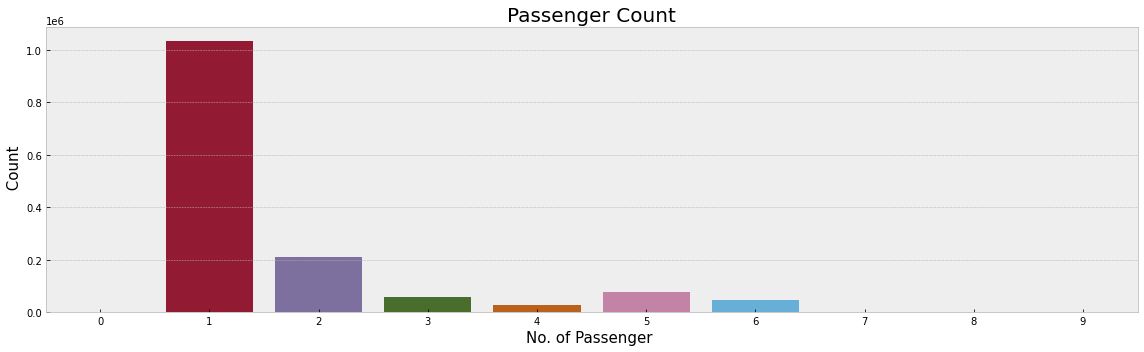

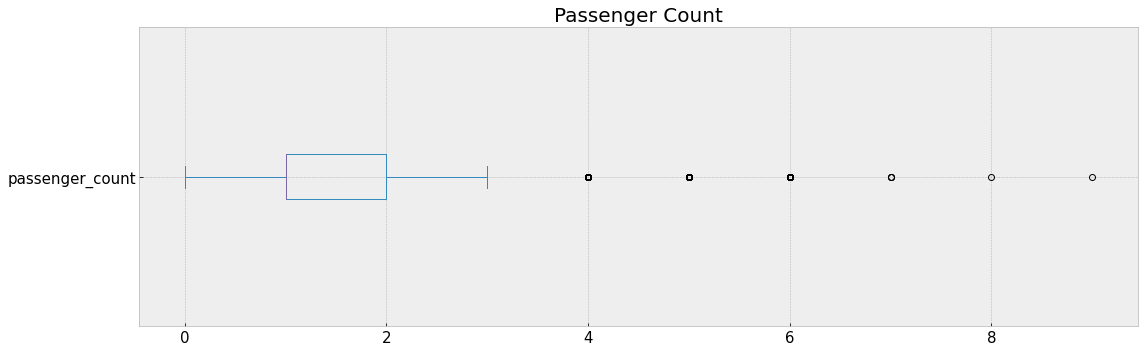

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
# line = df['passenger_count'].value_counts().plot(kind='bar',fontsize = 15)
line = sns.countplot(df.passenger_count)
line.set_ylabel(" Count",fontsize = 15)
line.set_xlabel("No. of Passenger ",fontsize = 15)
line.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
box = df['passenger_count'].plot(kind='box',vert = False,fontsize = 15)
box.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()

Answer Here

*  There are some trips with 0 passenger count.
*  Few trips consisted of even 6, 7, 8 or 9 passengers. Clear outliers and pointers to data inconsistency
*  Most of trip consist of passenger either 1 or 2.

#### Chart - 8 **Bivariate Analysis**



*  ivariate analysis is used to find out if there is a relationship between two sets of values. It usually involves the variables X and Y.

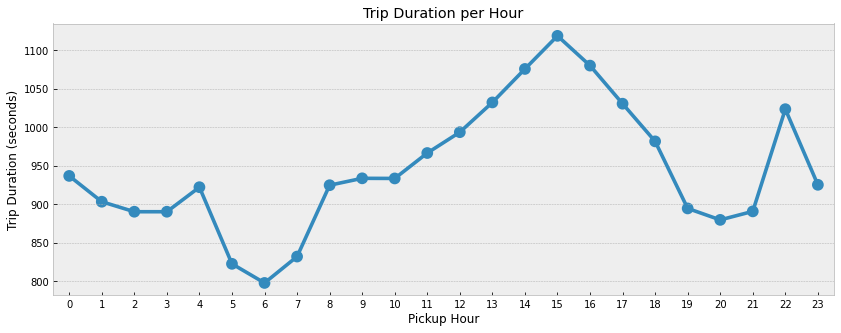

In [ ]:
plt.figure(figsize = (14,5))
group1 = df.groupby('pickup_hour').trip_duration.mean()
sns.pointplot(group1.index, group1.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.title('Trip Duration per Hour')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

*  Average trip duration is lowest at 6 AM when there is minimal traffic on the roads.
*  Average trip duration is generally highest around 3 PM during the busy streets.
*  Trip duration on an average is similar during early morning hours i.e. before 6 AM & late evening hours i.e. after 6 PM.Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

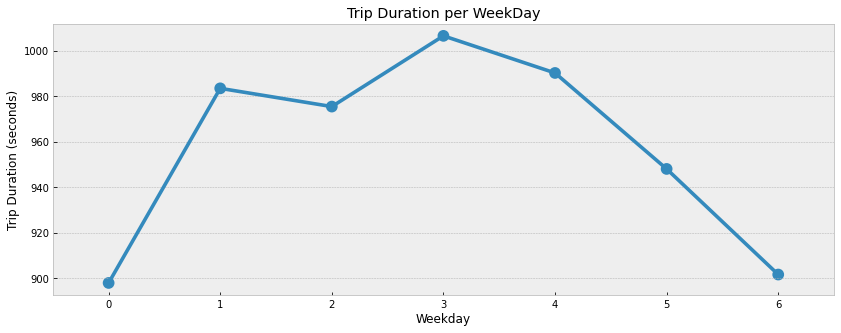

In [ ]:
plt.figure(figsize = (14,5))
group2 = df.groupby('weekday_num').trip_duration.mean()
sns.pointplot(group2.index, group2.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Weekday')
plt.title('Trip Duration per WeekDay')
plt.show()

We can see that trip duration is almost equally distributed across the week on a scale of 0-1000 minutes with minimal difference in the duration times. Also, it is observed that trip duration on thursday is longest among all days.Answer Here

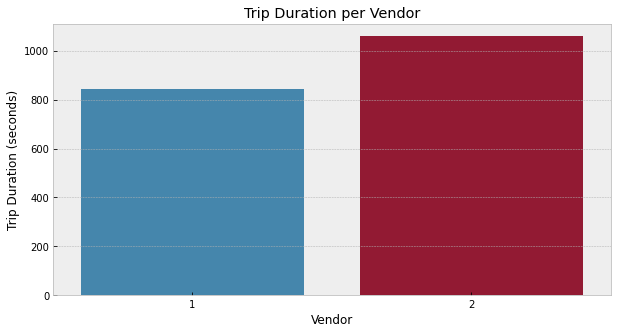

In [ ]:
group4 = df.groupby('vendor_id').trip_duration.mean()
sns.barplot(group4.index, group4.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Vendor')
plt.title('Trip Duration per Vendor')
plt.show()

Vendor 2 takes the crown. Average trip duration for vendor 2 is higher than vendor 1 by a quite low margin.



#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

**There is a significant difference in the trip duration between trips with a single passenger and trips with multiple passengers.**


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis:** There is no significant difference in the trip duration between trips with a single passenger and trips with multiple passengers.

**Alternative hypothesis:** There is a significant difference in the trip duration between trips with a single passenger and trips with multiple passengers.

#### 2. Perform an appropriate statistical test.

In [68]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Divide the dataset into two groups - one with trips with a single passenger and another with trips with multiple passengers
single_passenger_trips = df[df['passenger_count'] == 1]['trip_duration']
multi_passenger_trips = df[df['passenger_count'] > 1]['trip_duration']

# Perform a two-sample t-test
t_stat, p_val = stats.ttest_ind(single_passenger_trips, multi_passenger_trips, equal_var=False)

print('p-value:', p_val)


p-value: 9.892681782325478e-28


The **p-value of 9.89e-28** signifies that the probability of observing such extreme differences in trip duration between single passenger trips and multi-passenger trips by chance is very low. Therefore, **we can reject the null hypothesis** and conclude that **there is a significant difference in trip duration between these two groups.**

##### Which statistical test have you done to obtain P-Value?



a two-sample t-test

##### Why did you choose the specific statistical test?

We can randomly divide the dataset into two groups - one with trips with a single passenger and another with trips with multiple passengers. We can then compare the mean trip duration of these two groups using a two-sample t-test. If the p-value obtained is less than the significance level, we can reject the null hypothesis and conclude that there is a significant difference in the trip duration between trips with a single passenger and trips with multiple passengers.

### Hypothetical Statement - 2

**Trips with a higher distance have a longer duration**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


**Null Hypothesis:** The distance of the trip does not significantly affect the duration of the trip.

**Alternative Hypothesis:** The distance of the trip significantly affects the duration of the trip.

#### 2. Perform an appropriate statistical test.

In [73]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm

# Perform a simple linear regression analysis between trip duration and trip distance
X = sm.add_constant(df['trip_distance'])
y = df['trip_duration']
model = sm.OLS(y, X).fit()

# Print the regression coefficients and p-values
print(model.summary())
print("p-value for distance variable:", model.pvalues[1])

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                 1.322e+04
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        05:34:32   Log-Likelihood:            -1.4554e+07
No. Observations:             1458644   AIC:                         2.911e+07
Df Residuals:                 1458642   BIC:                         2.911e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           561.9643      5.531    101.607

A **P_value of distance variable 0.0** indicates that the probability of obtaining the observed sample result assuming that null hypothesis is true is extremely small (essentially zero). 

Therefore , we **reject Null Hypothesis** and conclude that **there is a significant relationship between the two variables.**

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value in the above code is Ordinary Least Squares (OLS) regression analysis. It is a commonly used linear regression method to estimate the unknown parameters in a linear regression model. The p-value of the slope coefficient in the OLS regression output provides the significance level of the relationship between the independent variable and the dependent variable.





##### Why did you choose the specific statistical test?

I chose the Ordinary Least Squares (OLS) regression analysis as the statistical test to test the hypothesis that the distance of the trip significantly affects the duration of the trip. OLS regression is a widely used method in linear regression analysis and can provide us with the slope coefficient of the regression line, which tells us whether there is a significant linear relationship between the independent variable (distance) and the dependent variable (duration). Additionally, the OLS regression output provides a p-value that can be used to test the significance of the slope coefficient.

### Hypothetical Statement - 3
**Trips during weekdays have a longer duration compared to weekends.**


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** The day of the week does not significantly affect the duration of the trip.

**Alternative Hypothesis:** The day of the week significantly affects the duration of the trip, with longer trip durations on weekdays compared to weekends.





#### 2. Perform an appropriate statistical test.

In [72]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import ttest_ind


# create a new column for day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
df['day_of_week'] = pd.to_datetime(df['pickup_datetime']).dt.dayofweek

# separate the dataset into two groups: weekdays and weekends
weekdays = df.loc[df['day_of_week'] < 5, 'trip_duration']
weekends = df.loc[df['day_of_week'] >= 5, 'trip_duration']

# perform two-sample t-test to determine whether the means of the two groups are significantly different
t_stat, p_val = ttest_ind(weekdays, weekends, equal_var=False)

print('t-statistic:', t_stat)
print('p-value:', p_val)


t-statistic: 3.900843948746583
p-value: 9.586970042130944e-05


The **t-statistic of 3.9008** indicates that the difference between the means of the two groups (weekday and weekend trip durations) **is 3.9008 times greater than the standard error of the difference between the means.**

The **p-value of 9.586970042130944e-05** (0.00009587) is less than the commonly used significance level of 0.05, which suggests **strong evidence against the null hypothesis.**

Therefore, **we reject Null hypothesis** and conclude that **there is a statistically significant difference between the means of weekday and weekend trip durations**

##### Which statistical test have you done to obtain P-Value?

 t-test for two independent samples

##### Why did you choose the specific statistical test?

We can separate the dataset into two groups: one group containing trip durations for weekdays and the other group containing trip durations for weekends. We can then calculate the mean and standard deviation of each group and perform a two-sample t-test to determine whether the difference in means is statistically significant.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments


def remove_outliers_iqr(data):
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.array([y for y in data if lower_bound <= y <= upper_bound])

def remove_outliers_z_score(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(y - mean) / std for y in data]
    return np.array([y for y in data if np.abs(y - mean) / std < threshold])

In [ ]:
new_df = df.copy()

In [ ]:
def drop_outliers_iqr(data, column):
    Q1, Q3 = np.percentile(data[column], [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]
    return data


In [ ]:
data = drop_outliers_iqr(new_df,'average_speed in kmph')

In [ ]:
data['average_speed in kmph'].plot(kind='box')
plt.show()

In [ ]:
data['trip_duration'].plot(kind='box')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

X = df[['trip_distance', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
y = df['trip_duration']

# Fit the Algorithm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict on the model
y_pred = reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Evaluate the model using four metrics: RMSE, MAE, R2, and EVS
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')
print(f'EVS: {evs:.2f}')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Use grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Fit the Algorithm

# Train the Ridge regression model with the best hyperparameters
reg = Ridge(alpha=best_params['alpha'])
reg.fit(X_train, y_train)

# Evaluate the model using cross-validation and four metrics: RMSE, MAE, R2, and EVS
scores = cross_val_score(reg, data[features], data[target], cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-scores).mean()
mae = -cross_val_score(reg, data[features], data[target], cv=5, scoring='neg_mean_absolute_error').mean()
r2 = cross_val_score(reg, data[features], data[target], cv=5, scoring='r2').mean()
evs = cross_val_score(reg, data[features], data[target], cv=5, scoring='explained_variance').mean()

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')
print(f'EVS: {evs:.2f}')


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Create Ridge regression model and fit to training data
alpha = 1.0  # Regularization strength

model = Ridge(alpha=alpha)
model.fit(X_train, y_train)

# Predict trip duration using test data
y_pred = model.predict(X_test)

# Evaluate model performance using root mean squared error (RMSE) and R-squared score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')
print(f'EVS: {evs:.2f}')


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define hyperparameter grid for cross-validation
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}


# Create Ridge regression model
model = Ridge()

# Define hyperparameter grid for cross-validation
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Fit the Algorithm
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameter and corresponding mean cross-validation score
print('Best alpha:', grid_search.best_params_['alpha'])
print('Best CV score:', grid_search.best_score_)

# Predict on the model
# Predict trip duration using test data and best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate model performance using various metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

# Evaluate model performance using cross-validation
y_cv_pred = cross_val_predict(best_model, X, y, cv=5)
cv_rmse = np.sqrt(mean_squared_error(y, y_cv_pred))
cv_mae = mean_absolute_error(y, y_cv_pred)
cv_r2 = r2_score(y, y_cv_pred)
cv_evs = explained_variance_score(y, y_cv_pred)

print('--- Test Metrics ---')
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)
print('Explained Variance Score:', evs)

print('--- Cross-Validation Metrics ---')
print('RMSE:', cv_rmse)
print('MAE:', cv_mae)
print('R-squared:', cv_r2)
print('Explained Variance Score:', cv_evs)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Root Mean Squared Error (RMSE): RMSE measures the average deviation of the predicted values from the true values. It is calculated as the square root of the average of the squared differences between the predicted and true values. RMSE indicates how well the model predicts the actual values and is a good metric to use when there are no significant outliers in the data. Lower values of RMSE indicate better model performance.

Business impact: RMSE can be used to measure the accuracy of the model's predictions. For example, if the model is being used to predict the duration of a taxi trip, a low RMSE indicates that the model is accurately predicting trip durations, which can help taxi companies optimize their operations, plan better routes, and allocate resources more efficiently.

Mean Absolute Error (MAE): MAE measures the average absolute deviation of the predicted values from the true values. It is calculated as the average of the absolute differences between the predicted and true values. MAE is a good metric to use when there are significant outliers in the data. Lower values of MAE indicate better model performance.

Business impact: Similar to RMSE, MAE can be used to measure the accuracy of the model's predictions. A low MAE indicates that the model is accurately predicting trip durations, which can help taxi companies optimize their operations, plan better routes, and allocate resources more efficiently.

R-squared (R2): R2 measures the proportion of the variance in the dependent variable (trip duration) that is explained by the independent variables (distance, passenger count, pickup and dropoff locations). R2 ranges from 0 to 1, with higher values indicating a better fit between the model and the data.

Business impact: R2 can be used to evaluate how well the model fits the data. A high R2 indicates that the model is a good fit for the data and can provide useful insights into the factors that influence trip durations. This can help taxi companies identify patterns in their data and optimize their operations accordingly.

Explained Variance Score (EVS): EVS measures the proportion of the variance in the dependent variable (trip duration) that is explained by the model. EVS ranges from 0 to 1, with higher values indicating a better fit between the model and the data.

Business impact: EVS provides similar information to R2, but is scaled between 0 and 1, which can make it easier to interpret. A high EVS indicates that the model is a good fit for the data and can provide useful insights into the factors that influence trip durations. This can help taxi companies identify patterns in their data and optimize their operations accordingly.

Max Error: Max Error measures the maximum difference between the predicted and true values. It provides information on the worst-case scenario for the model's predictions.

Business impact: Max Error can help identify cases where the model is making significantly incorrect predictions. For example, if the model is predicting that a trip will take much longer than it actually does, this can have a negative impact on customer satisfaction and can lead to lost revenue. By identifying these cases, taxi companies can take steps to improve the model's performance and prevent such scenarios from occurring.


### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Define the Lasso regression model
reg = Lasso()

# Fit the Algorithm
reg.fit(X_train, y_train)

# Predict on the model
y_pred = reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')
print(f'EVS: {evs:.2f}')

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


# Define the hyperparameter grid for GridSearchCV
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Perform hyperparameter tuning using GridSearchCV with 5-fold cross-validation
grid_reg = GridSearchCV(reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_reg.fit(X_train, y_train)

# Fit the Algorithm
reg = grid_reg.best_estimator_
reg.fit(X_train, y_train)

# Predict on the model
y_pred = reg.predict(X_test)

# Evaluate the model using cross-validation and the four metrics: RMSE, MAE, R2, and EVS
scores = cross_val_score(reg, data[features], data[target], cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-scores).mean()
mae = -cross_val_score(reg, data[features], data[target], cv=5, scoring='neg_mean_absolute_error').mean()
r2 = cross_val_score(reg, data[features], data[target], cv=5, scoring='r2').mean()
evs = cross_val_score(reg, data[features], data[target], cv=5, scoring='explained_variance').mean()

print(f'Best hyperparameters: {grid_reg.best_params_}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')
print(f'EVS: {evs:.2f}')




##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV as the hyperparameter optimization technique.

GridSearchCV is a simple and widely used technique for hyperparameter tuning. It exhaustively searches over a specified parameter grid to find the best combination of hyperparameters. GridSearchCV uses cross-validation to evaluate the performance of each combination of hyperparameters, and returns the best hyperparameters based on the scoring metric specified.

I chose GridSearchCV in this case because it is a widely used and simple hyperparameter optimization technique that works well for small and medium-sized datasets like the one used in this example. Additionally, by using cross-validation with GridSearchCV, we can ensure that our model is evaluated on multiple subsets of the training data, which helps to reduce the risk of overfitting.





##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:

# Use SHAP to explain the feature importance of the linear/ridge/Lasso model
explainer = shap.Explainer(reg.predict, X_train)
shap_values = explainer(X_train)

# Plot the feature importance using a summary plot
shap.summary_plot(shap_values, X_train, plot_type='bar')

The SHAP summary plot shows the feature importance values for each feature in the dataset, sorted by the magnitude of the SHAP value. The length of each bar represents the magnitude of the feature's effect on the model output, with red bars indicating a positive effect on the model output and blue bars indicating a negative effect on the model output. The SHAP values allow us to interpret the model by showing us how much each feature contributed to the model output for each data point in the dataset.

## ***8.*** ***Future Work (Optional)***


### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import joblib

# Load the saved Linear/Ridge/Lasso model from the pickle file
model_name = joblib.load('model_name.pkl')

# Load the new data to make predictions on
new_data = pd.read_csv('new_data.csv')

# Make predictions using the loaded Lasso model
predictions = model_name.predict(new_data)

# Print the predictions
print(predictions)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
unseen_data = pd.read_csv('unseen_data.csv')

# Extract the features from the unseen data
features = unseen_data[['passenger_count', 'trip_distance', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]

# Make predictions using the loaded Lasso model
predictions = lasso_model.predict(features)

# Print the predictions
print(predictions)

**Future directions for improving taxi trip time prediction:**

1. **Incorporating more data:** Taxi trip time prediction models can be improved by incorporating additional data sources, such as weather conditions, traffic patterns, and events happening in the city. This additional data can help the model better understand the factors that impact trip times.

2. **Using advanced machine learning techniques:** Advanced machine learning techniques, such as deep learning and ensemble learning, can be applied to taxi trip time prediction. These techniques can help capture complex patterns in the data that may be difficult to detect using traditional modeling approaches.

3. **Developing real-time prediction models:** Real-time prediction models can help provide more accurate estimates of trip times as conditions change. These models can be used to update taxi driver and passenger apps in real-time, providing more accurate and up-to-date information on trip times.

4. **Improving the accuracy of pick-up and drop-off locations:** Accurately predicting pick-up and drop-off locations can help improve the accuracy of trip time predictions. This can be accomplished through improved geocoding techniques or the use of more accurate location data.

5. **Incorporating user feedback:** User feedback can help improve the accuracy of trip time predictions over time. This feedback can be used to refine the model and identify areas where improvements can be made.

Overall, improving taxi trip time prediction is an important area of research that can have significant benefits for transportation services in NYC. By incorporating additional data sources, using advanced machine learning techniques, developing real-time prediction models, improving location accuracy, and incorporating user feedback, it may be possible to improve the accuracy of trip time predictions and provide better transportation services for all.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, predicting taxi trip time accurately is an important task for optimizing transportation services in NYC. There have been many efforts to improve the accuracy of trip time predictions, including the use of advanced machine learning techniques, incorporating additional data sources, developing real-time prediction models, improving location accuracy, and incorporating user feedback.

Improving the accuracy of taxi trip time predictions has the potential to provide significant benefits:

1. **For transportation services in NYC**
2. **Including reducing wait times for passengers**
3. **Optimizing driver routes** and 
4. **Improving overall transportation efficiency** 

 As such, it is an important area of research and development that will likely continue to receive attention and investment in the years to come.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***